# How neural nets work, dumbed down

As I'm learning how neural networks and transformers work, this is my attempt to crystallize my understanding with the simplest possible examples of different concepts

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from PIL import Image, ImageSequence

%matplotlib inline

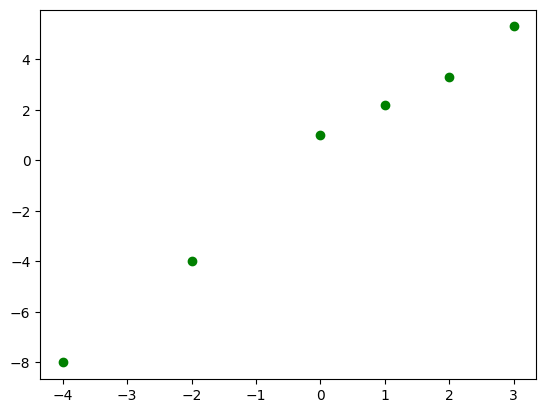

In [2]:
# Let's create some pretend training data, a simple line (almost)
x = [-4, -2, 0,1,2,3]
y = [-8,-4, 1, 2.2, 3.3, 5.3]
plt.plot(x, y, 'og')

In [3]:
# We're going to create the simplest model, a single "neuron"
# It will only have two parameters: m and b 
# It's also the same as a basic linear regression
# y = m*x + b
# A real neural net would have many, many of these interacting with each other

In [4]:
# Let's initialize m and b to some random values
# m = random.random()
# b = random.random()
m = -3
b = 20
print(f'{m=}')
print(f'{b=}')

m=-3
b=20


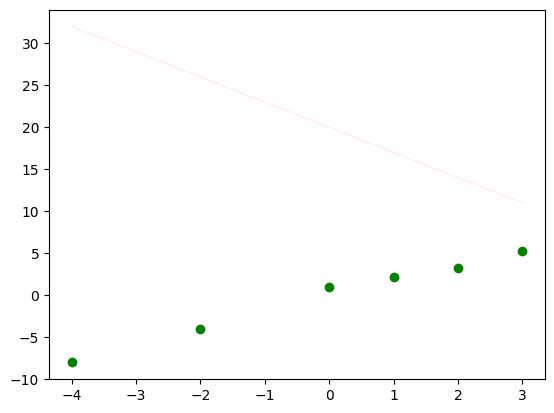

In [5]:
# Now let's initialize some variables to track our progress with every training pass (forward and back propagation)
losses = []
passes = 0

# And let's setup a fig so we can plot the gradient descent 
fig, ax = plt.subplots()
ax.plot(x, y, 'og')

# Calculate y with our initialized m and b params
y_pred = [xi * m + b for xi in x]

# Plot it
ax.plot(x, y_pred, 'r', alpha = 0.05)

# And let's start to collect frames for a GIF of the gradient descent
frames = []
fig.canvas.draw()
image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
frames.append(Image.fromarray(image))

In [6]:
# Training loop is extremely simple

for _ in range(50):
    passes +=1

    # Iterate through the training data
    # We could randomly select but we are keeping it simple
    for i in range(len(x)):

        # Forward pass to calculate output
        # This is just y = mx + b for the current input data
        out = m * x[i] + b
        
        # Calculate the loss and keep track of it 
        loss = out - y[i]
        losses.append(loss)
        
        # Now the magic: backward propagation 

        # First we pick a step size 
        # There is a whole art form to picking this right
        # Basically it's how far we want to nudge our parameters each pass
        # Too large moves them faster but we might skip PAST the optimal value
        # Too small takes forever to train
        step_size = 0.01

        # Next we calculate the gradient of each parameter
        # Which is the derivative of how the loss changes compared to how the param changes
        # In other words, which direction do we need to move the parameter to minimize the loss
        # And how much do we need to move it (is it very sensitive or not)
        # We multiply the parameter gradient by the loss due to the chain rule to find the gradient with respect to the loss

        # Let's start with the gradient for parameter b
        # It's super simple, it's just 1 since it's a constant
        # dy/db = 1
        # Here's the math with the formula for a derivative        
        # b_grad_calc = ((m*x + b+h) -  (m*x + b)) / h 
                    # =  (m*x - m*x +b-b +h) / h
                    # =   h / h = 1
        b_grad = 1 * loss 

        # The gradient of m is also straightforward, it's just x
        # dy/dm = x
        # Here's the math with the formula for a derivative
        # m_grad_calc = (((m+h)x + b) - (mx + b)) / h
                    # = (mx +hx +b -mx - b ) / h
                    # = hx / x = x
        m_grad = x[i] * loss 
        
        # Now we do our backward propagation step
        # We adjust each parameter based on the step size and it's linear gradient
        # AKA we nudge the parameters in the direction that will decrease our loss
        m -= m_grad * step_size
        b -= b_grad * step_size

        # Optionally can print out variables for debugging        
        # print(f'{loss=}')
        # print(f'{m=}')
        # print(f'{b=}')

    # At the end of each pass through all the training data we'll calculate predictions and plot them
    # This shows us how close our model is to the real training data
    y_pred = [xi * m + b for xi in x]
    ax.plot(x, y_pred, 'r', alpha = 1 - np.exp(-0.05 * passes))

    # We'll also add the chart to our GIF
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(image))

In [7]:
# Save the GIF
frames[0].save('sgd_line_test.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)

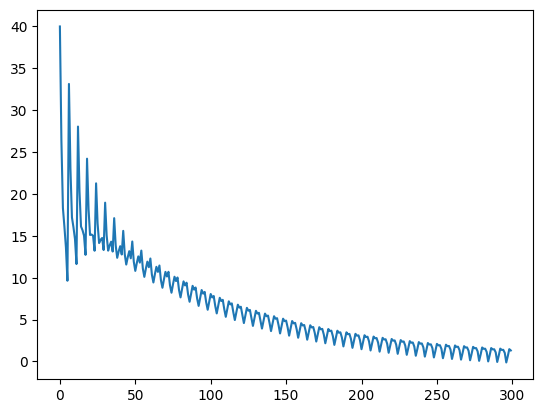

In [8]:
# Plot how the losses changed over time
plt.plot(losses)

In [ ]:
# Now let's use a quadratic instead of a linear equation
# y = ax^2 + bx + c
# Initialize a, b, and c
a = 0
b = 0
c = 0

for _ in range(50):
    passes += 1

    for i in range(len(x)):
        
        # Forward pass using quadratic equation
        out = a * x[i]**2 + b * x[i] + c
        
        # Calculate the loss
        loss = out - y[i]
        losses.append(loss)
        
        step_size = 0.01
        
        # Gradients for a, b, and c
        
        # For a: dy/da = x^2
        a_grad = x[i]**2 * loss
        
        # For b: dy/db = x
        b_grad = x[i] * loss

        # For c: dy/dc = 1 (like it was for 'b' in the linear equation)
        c_grad = 1 * loss 
        
        # Backpropagation
        a -= a_grad * step_size
        b -= b_grad * step_size
        c -= c_grad * step_size

        # Optionally can print out variables for debugging
        # print(f'{loss=}')
        # print(f'{a=}')
        # print(f'{b=}')
        # print(f'{c=}')

    y_pred = [a*xi**2 + b*xi + c for xi in x]
    ax.plot(x, y_pred, 'r', alpha = 1 - np.exp(-0.05 * passes))

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(image))


In [ ]:
# Now let's do it with square loss 
# TODO

In [ ]:
# Now let's convert to array operations
# TODO